# Step 1 -> Importing the dataset

In [14]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime

# Step 2 -> Loading the dataset

In [16]:
# Load datasets
Sales = pd.read_csv(r"C:\Users\jeyaj\Downloads\GUVI\Mini-Project 2\Sales.csv", encoding='Windows-1252')
Customer = pd.read_csv(r"C:\Users\jeyaj\Downloads\GUVI\Mini-Project 2\Customers.csv", encoding='Windows-1252')
Products = pd.read_csv(r"C:\Users\jeyaj\Downloads\GUVI\Mini-Project 2\Products.csv", encoding='Windows-1252')
Stores = pd.read_csv(r"C:\Users\jeyaj\Downloads\GUVI\Mini-Project 2\Stores.csv", encoding='Windows-1252')
Exchange_rates = pd.read_csv(r"C:\Users\jeyaj\Downloads\GUVI\Mini-Project 2\Exchange_rates.csv", encoding='Windows-1252')


# Step 1.1: Merge the dataset of Sales and Exchange_Rates with unique column on 'Order Data' and 'Currrency'
merged_dataset_1 = pd.merge(Sales, Exchange_rates, left_on=['Order Date', 'Currency Code'], right_on= ['Date', 'Currency'], how='inner')

# Step 1.2: Merge Sales and Customer datasets on 'CustomerKey'
merged_dataset_2 = pd.merge(merged_dataset_1, Customer, on='CustomerKey', how='inner')

# Step 1.3: Merge the result with Products dataset on 'ProductKey'
merged_dataset_3 = pd.merge(merged_dataset_2, Products, on='ProductKey', how='inner')

# Step 1.4: Merge the result with Stores dataset on 'StoreKey'
df = pd.merge(merged_dataset_3, Stores, on='StoreKey', how='inner')

df

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Date,...,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,Country_y,State_y,Square Meters,Open Date
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD,1/1/2016,...,$31.27,$68.00,406,Cameras & Camcorders Accessories,4,Cameras and camcorders,Canada,Nunavut,1210.0,4/4/2015
1,1998016,1,6/20/2020,NaN,399053,10,87,5,CAD,6/20/2020,...,$45.98,$99.99,106,Bluetooth Headphones,1,Audio,Canada,Nunavut,1210.0,4/4/2015
2,1730028,2,9/26/2019,NaN,245143,10,87,6,CAD,9/26/2019,...,$45.98,$99.99,106,Bluetooth Headphones,1,Audio,Canada,Nunavut,1210.0,4/4/2015
3,2214002,4,1/22/2021,NaN,384783,10,1619,5,CAD,1/22/2021,...,$27.59,$59.99,602,Movie DVD,6,"Music, Movies and Audio Books",Canada,Nunavut,1210.0,4/4/2015
4,1394030,5,10/25/2018,NaN,397223,10,52,1,CAD,10/25/2018,...,$91.95,$199.95,104,Recording Pen,1,Audio,Canada,Nunavut,1210.0,4/4/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62879,427005,7,3/2/2016,NaN,129494,2,411,1,AUD,3/2/2016,...,$321.44,$699.00,301,Laptops,3,Computers,Australia,Northern Territory,665.0,1/12/2008
62880,485004,6,4/29/2016,NaN,105647,2,1510,1,AUD,4/29/2016,...,$65.77,$129.00,504,Smart phones & PDAs,5,Cell phones,Australia,Northern Territory,665.0,1/12/2008
62881,485004,3,4/29/2016,NaN,105647,2,1983,1,AUD,4/29/2016,...,$220.64,$665.94,803,Microwaves,8,Home Appliances,Australia,Northern Territory,665.0,1/12/2008
62882,485004,2,4/29/2016,NaN,105647,2,70,7,AUD,4/29/2016,...,$22.05,$47.95,106,Bluetooth Headphones,1,Audio,Australia,Northern Territory,665.0,1/12/2008


# Step 3 -> Cleaning the dataset

#### 1 => To clean the dataset at first we need to check any missing values, data types and it's shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order Number    62884 non-null  int64  
 1   Line Item       62884 non-null  int64  
 2   Order Date      62884 non-null  object 
 3   Delivery Date   13165 non-null  object 
 4   CustomerKey     62884 non-null  int64  
 5   StoreKey        62884 non-null  int64  
 6   ProductKey      62884 non-null  int64  
 7   Quantity        62884 non-null  int64  
 8   Currency Code   62884 non-null  object 
 9   Date            62884 non-null  object 
 10  Currency        62884 non-null  object 
 11  Exchange        62884 non-null  float64
 12  Gender          62884 non-null  object 
 13  Name            62884 non-null  object 
 14  City            62884 non-null  object 
 15  State Code      62854 non-null  object 
 16  State_x         62884 non-null  object 
 17  Zip Code        62884 non-null 

<Axes: >

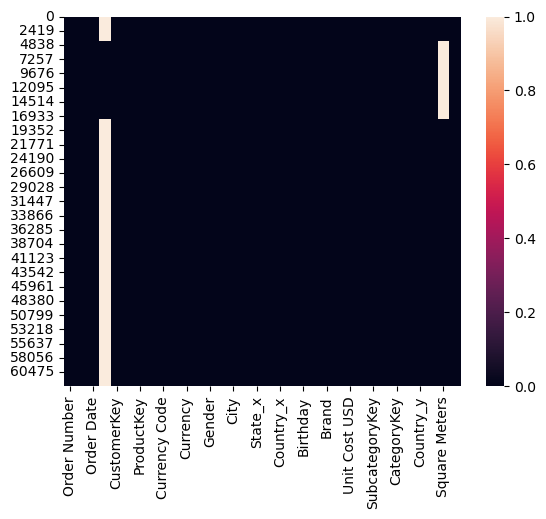

In [19]:
df.info()

sns.heatmap(df.isnull())

* => There is almost 79% of missing value in the column `Delivery Date`

* => There is also 20% of missing values in the column `Square Meters`

* => We need to change the column type from obejct to float for the column `Unit Cost USD` and `Unit Price USD`

### 3.1 => Due to many missing values in column `Delivery Date` we are droping it

In [22]:
df.drop(['Delivery Date'], axis= 1, inplace = True)

### 3.2 => To add missing values in `Square Meters` we are using mean Impute meathod
The mean imputation function replaces missing values in a dataset with the mean of the non-missing values in the same column.

In [24]:
df['Square Meters'] = df['Square Meters'].fillna(df['Square Meters'].mean())

### 3.3 => There is `$` symbol in the column `Unit Cost USD` and `Unit Price USD` , So we are going to remove and change it's data type

In [26]:
# Remove non-numeric characters (example for commas and dollar signs)
df['Unit Cost USD'] = df['Unit Cost USD'].str.replace('[\$,]', '', regex=True).astype(float)

df['Unit Price USD'] = df['Unit Price USD'].str.replace('[\$,]', '', regex=True).astype(float)

### 3.4 => Checking any `Nan` values in overall dataset

In [28]:
Nan_state= df.columns[df.isna().any()].tolist() # List of columns with NaN values
Nan_state

['State Code']

In [29]:
# Replacing `nan` values by `Unknown`
df['State Code'] = df['State Code'].fillna('Unknown')

In [30]:
nan_count_B = df['State Code'].isna().sum()
nan_count_B

0

# Step 4 => Preparation the dataset

#### Step 4.1 => Comparing the `Date` column of exchange and `Order Date` of Sales

In [32]:
# Convert the columns to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Date'] = pd.to_datetime(df['Date'])

# Compare the date columns
df['Dates_Equal'] = df['Date'] == df['Order Date']  # Check if Start_Date equals End_Date
df['Dates_Equal'].value_counts()

Dates_Equal
True    62884
Name: count, dtype: int64

#### Both coulmn are containing same date values so we are going to drop one of those column `Date` 

In [34]:
df.drop(['Date', 'Dates_Equal'], axis= 1, inplace = True)

In [65]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format="%m/%d/%Y", errors='coerce').dt.date
df['Birthday'] = pd.to_datetime(df['Birthday'])
df['Open Date'] = pd.to_datetime(df['Open Date'])

#### Step 4.2 => To analyse effectively we need to find the profit of the product (`Unit Price USD` - `Unit Cost USD`) and saving as a new column `Profit`

In [36]:
df['Profit'] = df['Unit Price USD']-df['Unit Cost USD']

#### Step 4.2 => We going to rename the column names for clear analyization in future

In [38]:
df.rename(columns={'State_x': 'Customer_Sate', 'Country_x': 'Customer_Country', 'City': 'Customer_City'}, inplace=True)
df.rename(columns={'State_y': 'Store_Sate', 'Country_y': 'Store_Country' }, inplace=True)

In [39]:
duplicates=df.duplicated().sum()
print(f"number of duplicates found:{duplicates}")

number of duplicates found:0


# Step 5 => Saving the Dataset

In [67]:
path = r"C:\Users\jeyaj\Downloads\GUVI\Mini-Project 2\Global_electronics_project.csv"
df.to_csv(path, index=False)
#C:\Users\jeyaj\Downloads\GUVI\Mini-Project 2

# Step 5 Connencting to Sql

In [43]:
import pymysql

conn = pymysql.connect(host='127.0.0.1', user='root', passwd='Mysql@17072000')
cur = conn.cursor()

# Create database if it doesn't exist
cur.execute("CREATE DATABASE IF NOT EXISTS Global_electronics_project")

cur.execute("USE Global_electronics_project")

0

In [44]:
# Create table query
cur.execute('''
    CREATE TABLE IF NOT EXISTS Overall_data (
        Order_Number INTEGER,
        Line_Item INTEGER NOT NULL,
        Order_Date VARCHAR(255) NOT NULL,
        CustomerKey INTEGER NOT NULL,
        StoreKey INTEGER NOT NULL,
        ProductKey INTEGER NOT NULL,
        Quantity INTEGER NOT NULL,
        Currency_Code VARCHAR(255) NOT NULL,
        Currency VARCHAR(255) NOT NULL,
        Exchange FLOAT NULL,        
        
        Gender VARCHAR(255) NULL,
        Name VARCHAR(255) NULL,        
        Customer_City VARCHAR(255) NULL,
        State_Code VARCHAR(255) NULL,
        Customer_State VARCHAR(255) NULL,
        Zip_Code VARCHAR(255) NULL,
        Customer_Country VARCHAR(255) NULL,
        Continent VARCHAR(255) NULL,
        Birthday VARCHAR(255) NULL,
        Product_Name VARCHAR(255) NULL,
        
        Brand VARCHAR(255) NULL,
        Color VARCHAR(255) NULL,
        Unit_Cost_USD FLOAT NULL,
        Unit_Price_USD FLOAT NULL,
        SubcategoryKey INTEGER NOT NULL,
        Subcategory VARCHAR(255) NOT NULL,
        CategoryKey INTEGER NOT NULL,
        Category VARCHAR(255) NOT NULL,
        Store_Country VARCHAR(255) NULL,
        Store_State VARCHAR(255) NULL,
        
        Square_Meters FLOAT NULL,
        Open_Date VARCHAR(255) NULL,
        Profit FLOAT NULL
    )
''')

print("Table Created")

Table Created


In [45]:
Insert_data = '''
    INSERT INTO Overall_data (
        Order_Number, 
        Line_Item, 
        Order_Date, 
        CustomerKey, 
        StoreKey, 
        ProductKey, 
        Quantity, 
        Currency_Code,  
        Currency, 
        Exchange, 
        
        Gender, 
        Name, 
        Customer_City, 
        State_Code, 
        Customer_State, 
        Zip_Code, 
        Customer_Country, 
        Continent, 
        Birthday, 
        Product_Name, 
        
        Brand, 
        Color, 
        Unit_Cost_USD, 
        Unit_Price_USD, 
        SubcategoryKey, 
        Subcategory, 
        CategoryKey, 
        Category, 
        Store_Country, 
        Store_State, 
        
        Square_Meters, 
        Open_Date, 
        Profit
    ) 
   VALUES ( %s, %s, %s, %s, %s, %s, %s, %s, %s, %s,  %s, %s, %s,  %s, %s, %s, %s, %s, %s, %s, %s, %s, %s,  %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
'''
Data = df.values.tolist()

try:
    # Insert data row by row
    for row in Data:
        try:
            cur.execute(Insert_data, row)
        except Exception as e:
            print(f"Error inserting row {row}: {e}")
            conn.rollback()
    conn.commit()
    print("Data Inserted Successfully")
except Exception as e:
    conn.rollback()
    print(f"Error during insertion: {e}")
finally:
    conn.close()

Data Inserted Successfully
